In [215]:
import pandas as pd
from gspread_pandas import Spread, Client
import pickle

spread = Spread("tags_ichbinsophiescholl")
df = spread.sheet_to_df(sheet="Archive")

df.columns
# df.to_csv("data/tags_corpus.csv")
# df.to_pickle("data/tags_corpus.pkl")

Index(['from_user', 'text', 'created_at', 'time', 'geo_coordinates',
       'user_lang', 'in_reply_to_user_id_str', 'in_reply_to_screen_name',
       'from_user_id_str', 'in_reply_to_status_id_str', 'source',
       'profile_image_url', 'user_followers_count', 'user_friends_count',
       'user_location', 'status_url', 'entities_str'],
      dtype='object')

In [4]:
df.head(5)

,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,user_location,status_url,entities_str
id_str,,,,,,,,,,,,,,,,,
1470138543410454533,HansSmit2,RT @historydefined: Pictured here are Hans Sch...,Sun Dec 12 21:08:37 +0000 2021,12/12/2021 21:08:37,,,,,1058063091097841664,,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1337095403...,1655,4157,"Derry, Maine",http://twitter.com/HansSmit2/statuses/14701385...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{..."
1470137715513389057,shalomegrace1,Sophie Scholl - partly responsible for stoppin...,Sun Dec 12 21:05:19 +0000 2021,12/12/2021 21:05:19,,,,,1215379886887428096,,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1215385418...,1128,1044,,http://twitter.com/shalomegrace1/statuses/1470...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[]..."
1470135347698978820,TeeBlas,"RT @vintagestuff4: Sophie Scholl, founder of t...",Sun Dec 12 20:55:55 +0000 2021,12/12/2021 20:55:55,,,,,2236806559,,"<a href=""https://mobile.twitter.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/1284359947...,141,1396,,http://twitter.com/TeeBlas/statuses/1470135347...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{..."
1470131299839008770,bodger_the,"RT @StephenCorrySvl: @KateChamberlay2 Yes, Sop...",Sun Dec 12 20:39:50 +0000 2021,12/12/2021 20:39:50,,,,,1321879107567820800,,"<a href=""https://mobile.twitter.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/1378783650...,1778,3405,Stockpot UK,http://twitter.com/bodger_the/statuses/1470131...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{..."
1470130938910842890,ElMandjo,RT @historydefined: Pictured here are Hans Sch...,Sun Dec 12 20:38:24 +0000 2021,12/12/2021 20:38:24,,,,,26127240,,"<a href=""http://twitter.com/#!/download/ipad"" ...",http://pbs.twimg.com/profile_images/1424495593...,531,2117,metropolitan Amsterdam,http://twitter.com/ElMandjo/statuses/147013093...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{..."


In [6]:
df.index

Index(['1470138543410454533', '1470137715513389057', '1470135347698978820',
       '1470131299839008770', '1470130938910842890', '1470130938910842890',
       '1470096140330835969', '1470083630798147586', '1470080216613756934',
       '1470079736927985672',
       ...
       '1460798341118312448', '1460798341118312448', '1460505253023993858',
       '1460322450583871489', '1460314408538804229', '1460314155303505931',
       '1460309460967215105', '1460308886913785859', '1460305184043802629',
       '1460305184043802629'],
      dtype='object', name='id_str', length=317)

In [42]:
df["time"] =

id_str
1470138543410454533    12/12/2021 21:08:37
1470137715513389057    12/12/2021 21:05:19
1470135347698978820    12/12/2021 20:55:55
1470131299839008770    12/12/2021 20:39:50
1470130938910842890    12/12/2021 20:38:24
                              ...         
1460314155303505931    15/11/2021 18:30:00
1460309460967215105    15/11/2021 18:11:21
1460308886913785859    15/11/2021 18:09:04
1460305184043802629    15/11/2021 17:54:21
1460305184043802629    15/11/2021 17:54:21
Name: time, Length: 317, dtype: object

<AxesSubplot:xlabel='day', ylabel='count'>

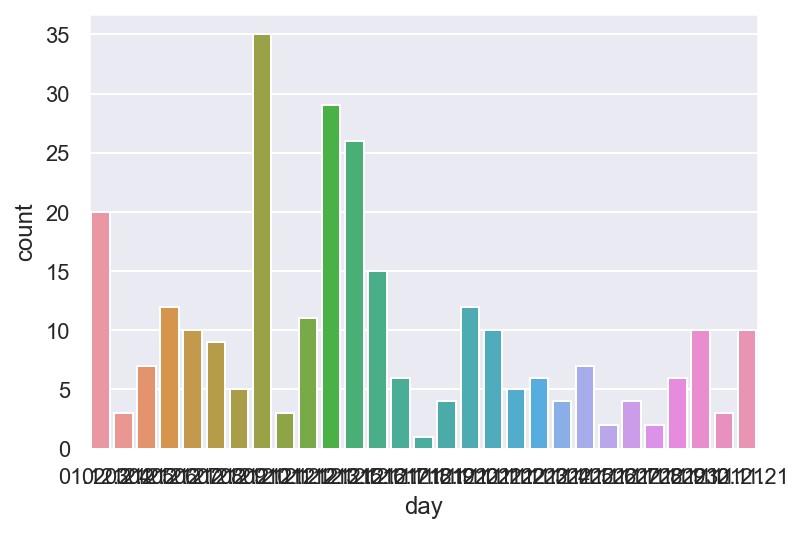

In [260]:
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

sns.set_theme()

df["day"] = [datetime.strptime(date, "%d/%m/%Y %H:%M:%S").strftime("%d.%m.%y") for date in df.time]
df["hour"] = [datetime.strptime(date, "%d/%m/%Y %H:%M:%S").strftime("%H:%M") for date in df.time]

tweets_per_day = df.groupby(["day", "hour"], as_index=False)["text"].count()
tweets_per_day

sns.countplot(data=tweets_per_day, x="day")